In [461]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.cluster import DBSCAN

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = [18, 9]

In [462]:
data_path = "../data/origineel"

if not Path(data_path).is_dir():
    raise Warning("Data path does not exist")

In [463]:
# Lijst van .csv-bestanden
data_file_paths = [p for p in Path(data_path).iterdir() if p.suffix==".csv"]

In [464]:
# Lees de drie bestanden van het circuit as pandas DataFrame
cableconfig = pd.read_csv(data_file_paths[15], sep=";")
partialdischarges = pd.read_csv(data_file_paths[16], sep=";")
warning = pd.read_csv(data_file_paths[17], sep=";")

In [465]:
# Namen van de kolommen
time_col, location_col, charge_col = partialdischarges.columns

# Check that each row either has location and charge undefinied, or both defined:
for i in np.arange(len(partialdischarges))[np.isnan(partialdischarges[location_col]) != np.isnan(partialdischarges[charge_col])]:
    raise Warning(f"Row {i} has missing values")

# Lijst met bools die aangeeft of er op dat tijdstip een PD was
pd_occured = ~np.isnan(partialdischarges[location_col])

# De drie kolommen; alleen op tijdstippen met PD
locations = partialdischarges[location_col][pd_occured]
charges = partialdischarges[charge_col][pd_occured]
times = partialdischarges[time_col][pd_occured].apply(datetime.datetime.fromisoformat)

In [466]:

# de data in de goede vorm zetten
data=np.empty((2,len(locations)))
data[0]=locations.index/2500
data[1]=locations
data=data.T

# DBSCAN uitvoeren
labels = DBSCAN(eps=10, min_samples=150).fit(data).labels_ 

# de labels die DBSCAN geeft toevoegen aan de dataframe
loc_frame = locations.to_frame()
loc_frame["times"]=pd.Series(times)
loc_frame.index=pd.RangeIndex(len(locations))
loc_frame["label"]=pd.Series(labels)


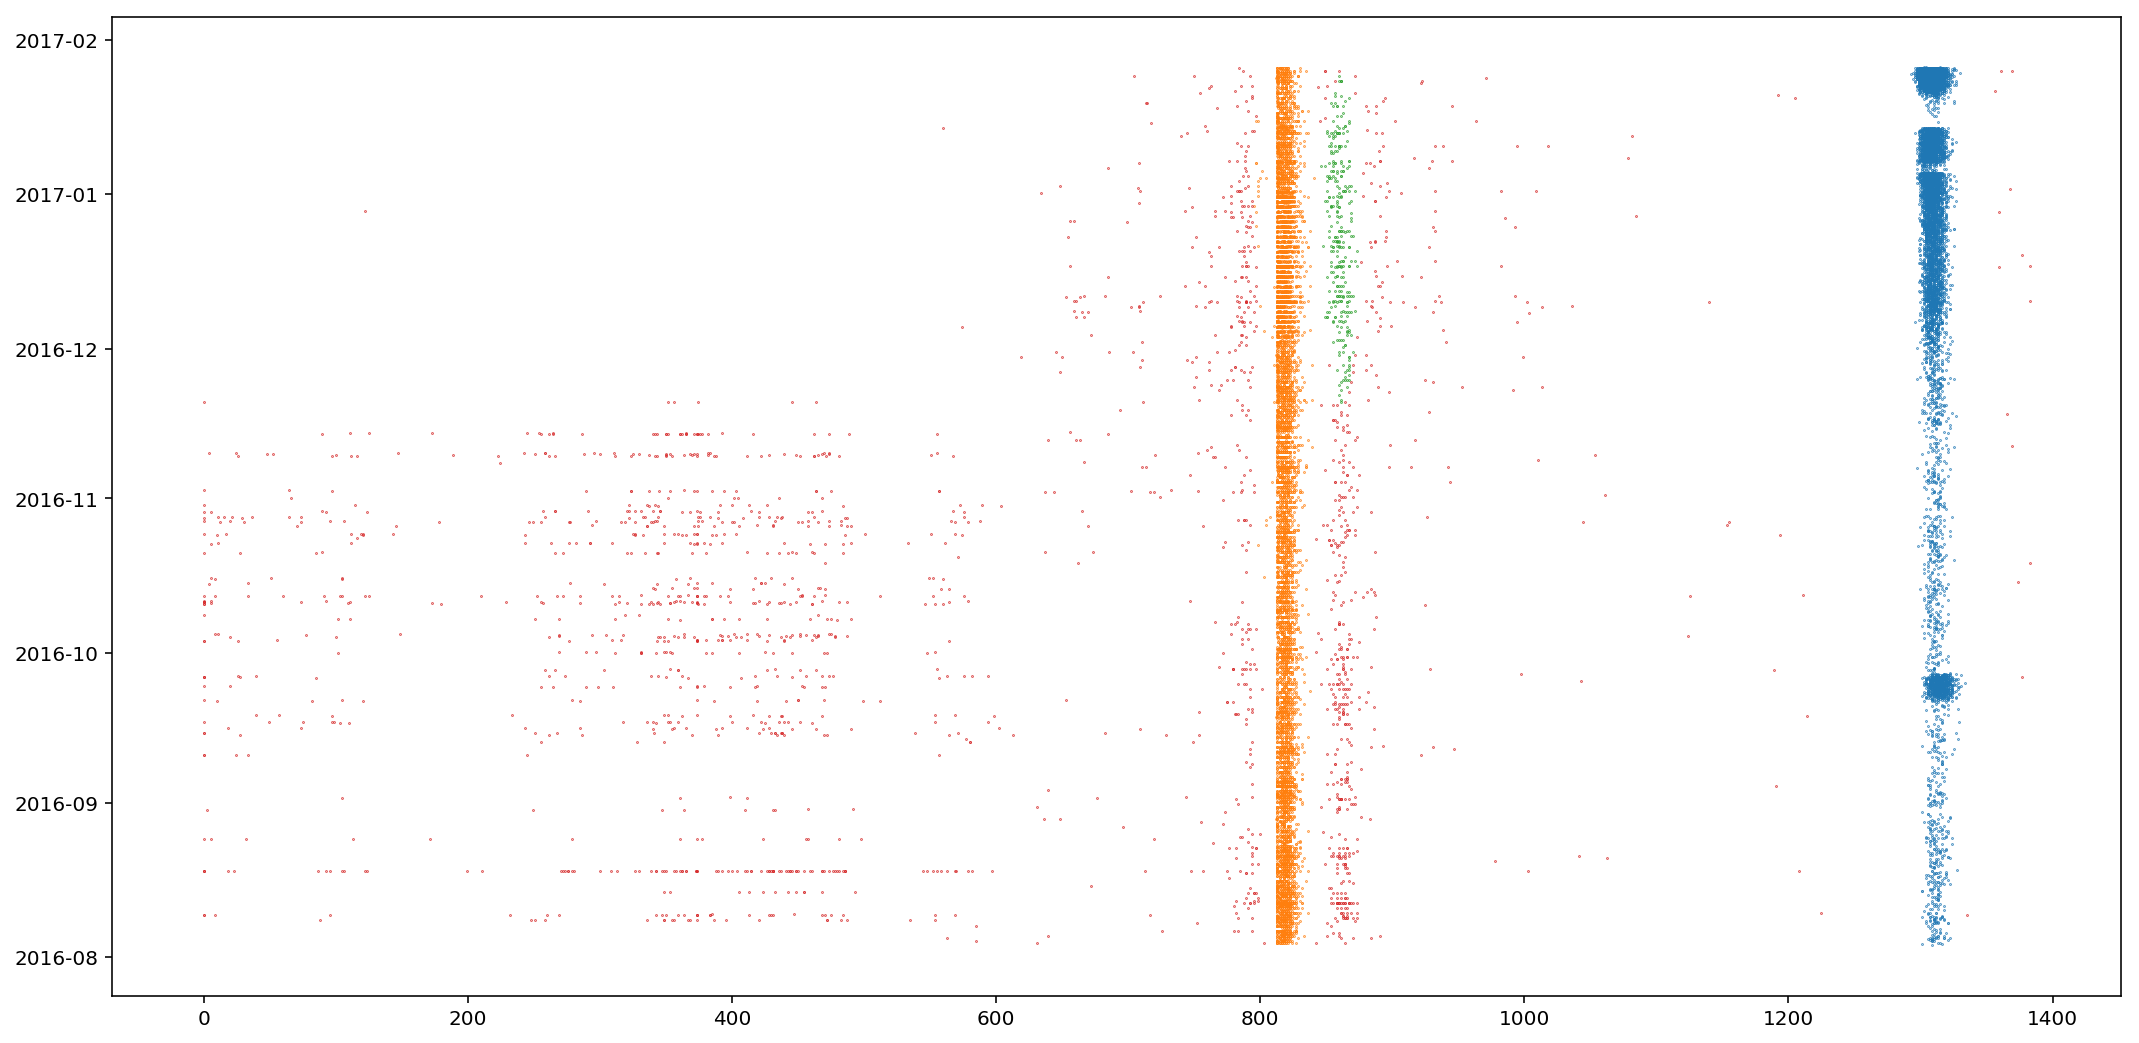

In [409]:
s=set(labels)
for i in s:
    plt.scatter(x = loc_frame[loc_frame["label"]==i][location_col], y = loc_frame[loc_frame["label"]==i]["times"], s=.1)

In [410]:
#Aantal gevonden clusters
len(s)-1

3

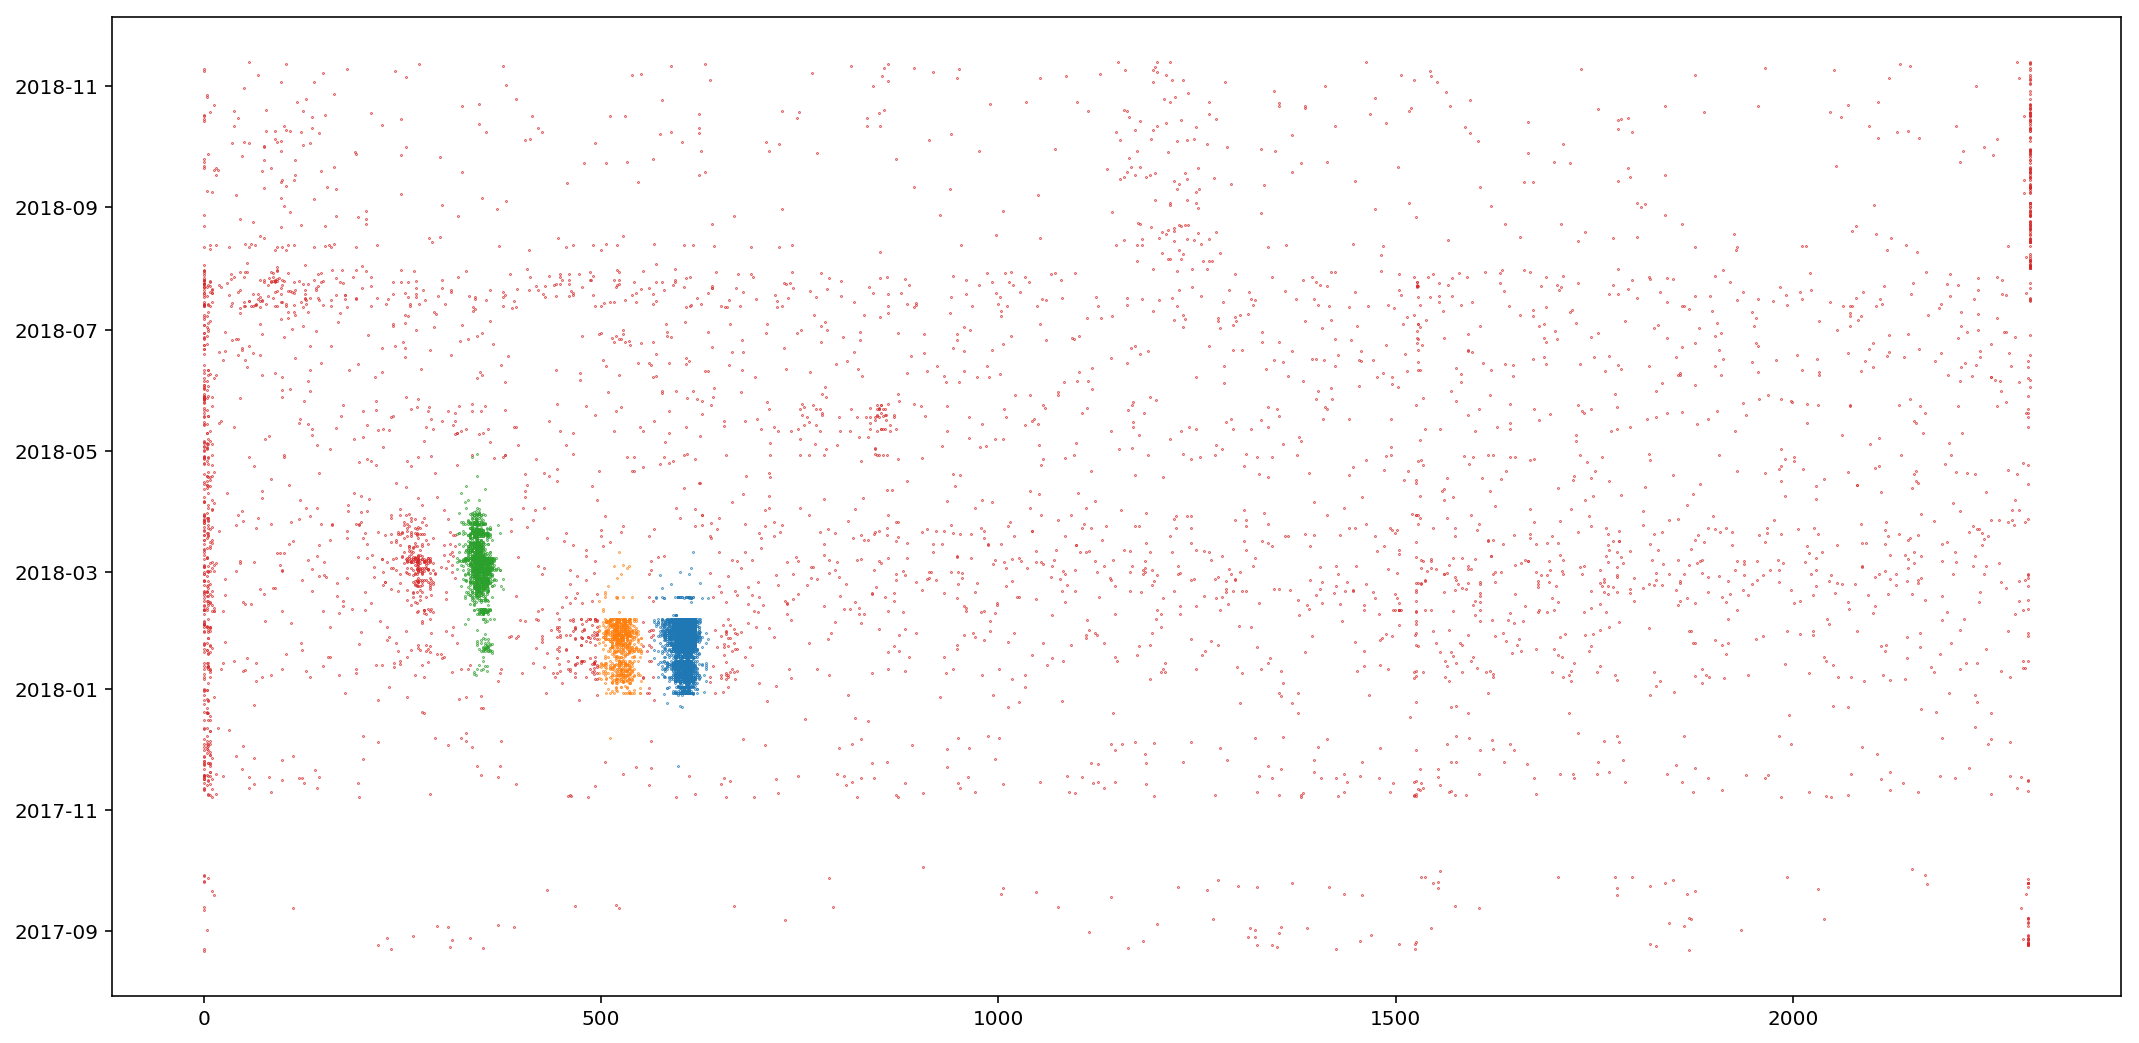

In [418]:
s=set(labels)
for i in s:
    plt.scatter(x = loc_frame[loc_frame["label"]==i][location_col], y = loc_frame[loc_frame["label"]==i]["times"], s=.1)

In [419]:
#Aantal gevonden clusters
len(s)-1

3

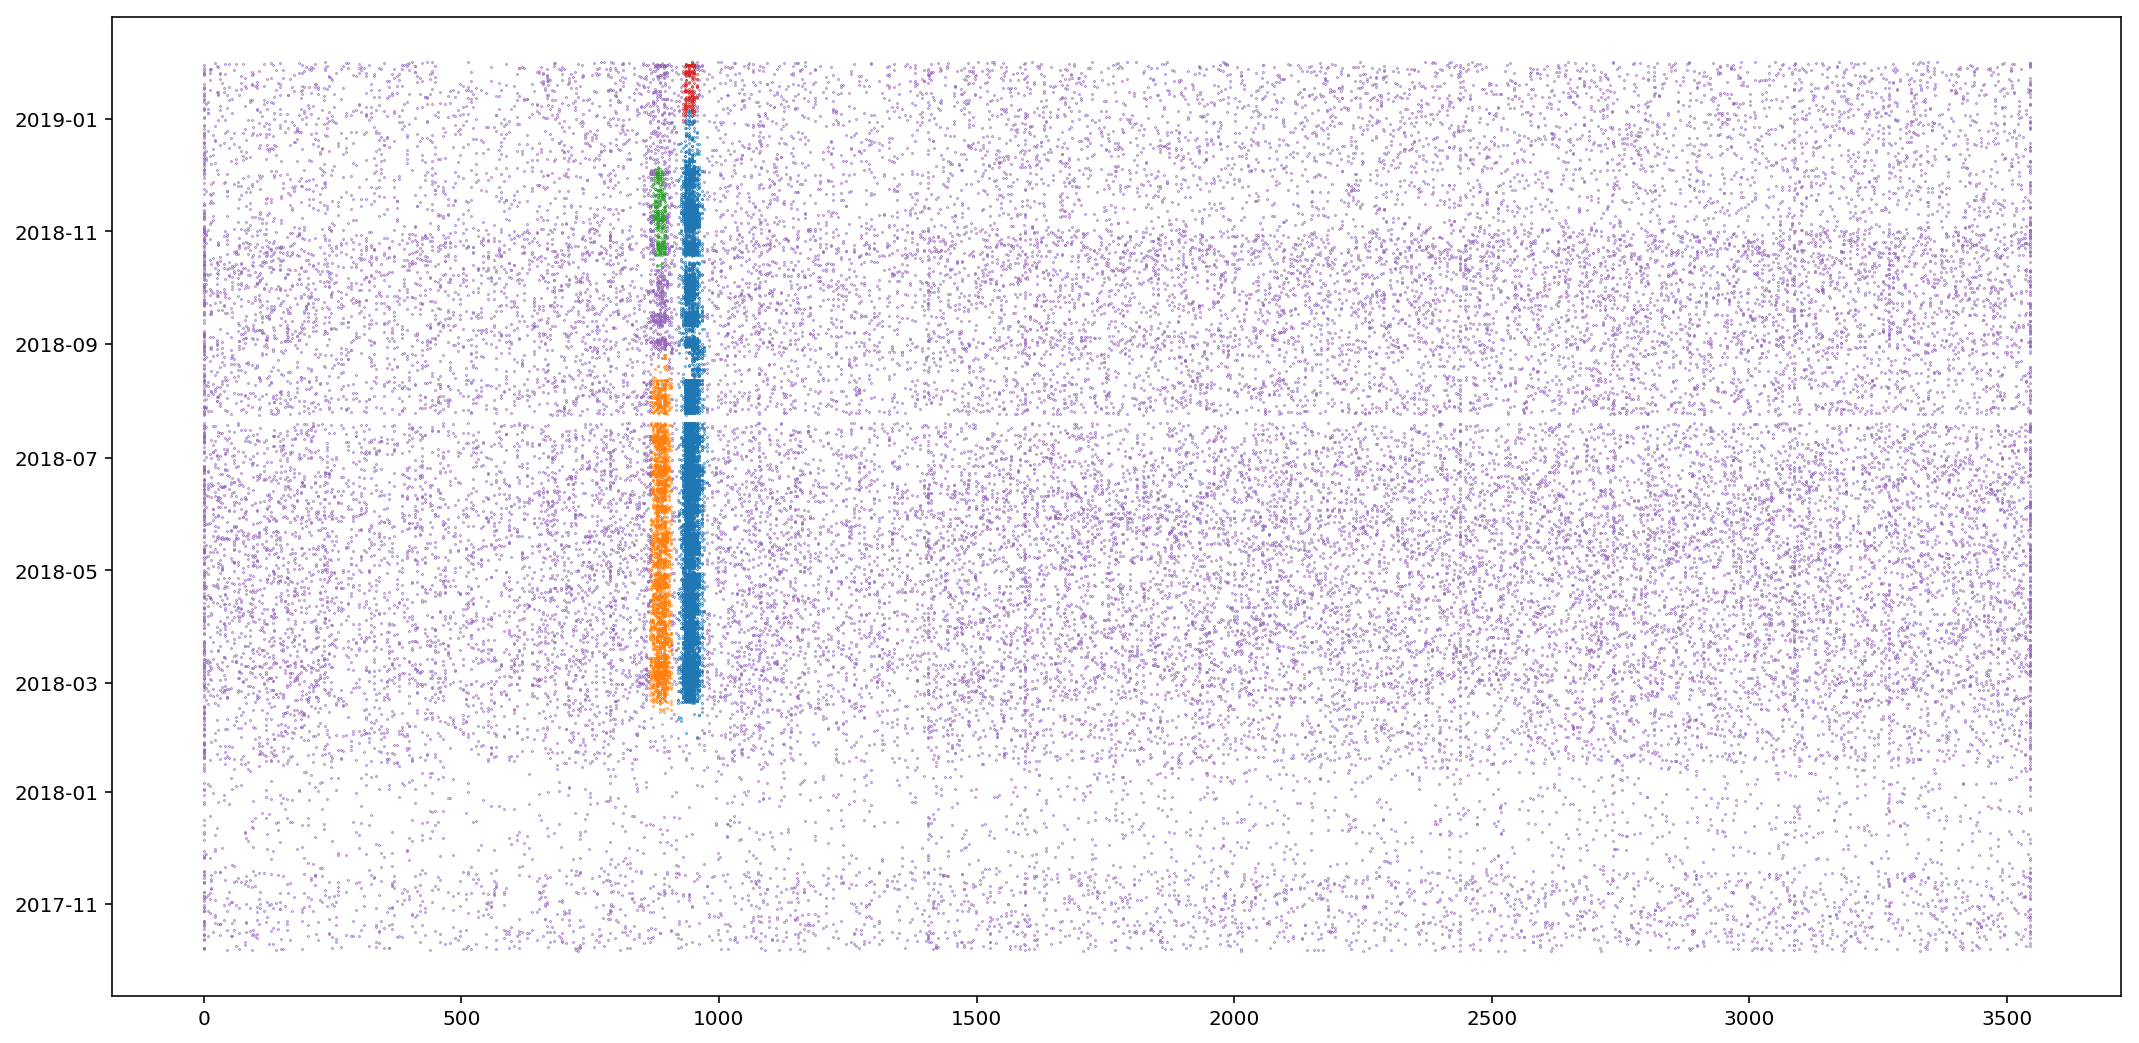

In [426]:
s=set(labels)
for i in s:
    plt.scatter(x = loc_frame[loc_frame["label"]==i][location_col], y = loc_frame[loc_frame["label"]==i]["times"], s=.1)

In [427]:
#Aantal gevonden clusters
len(s)-1

4

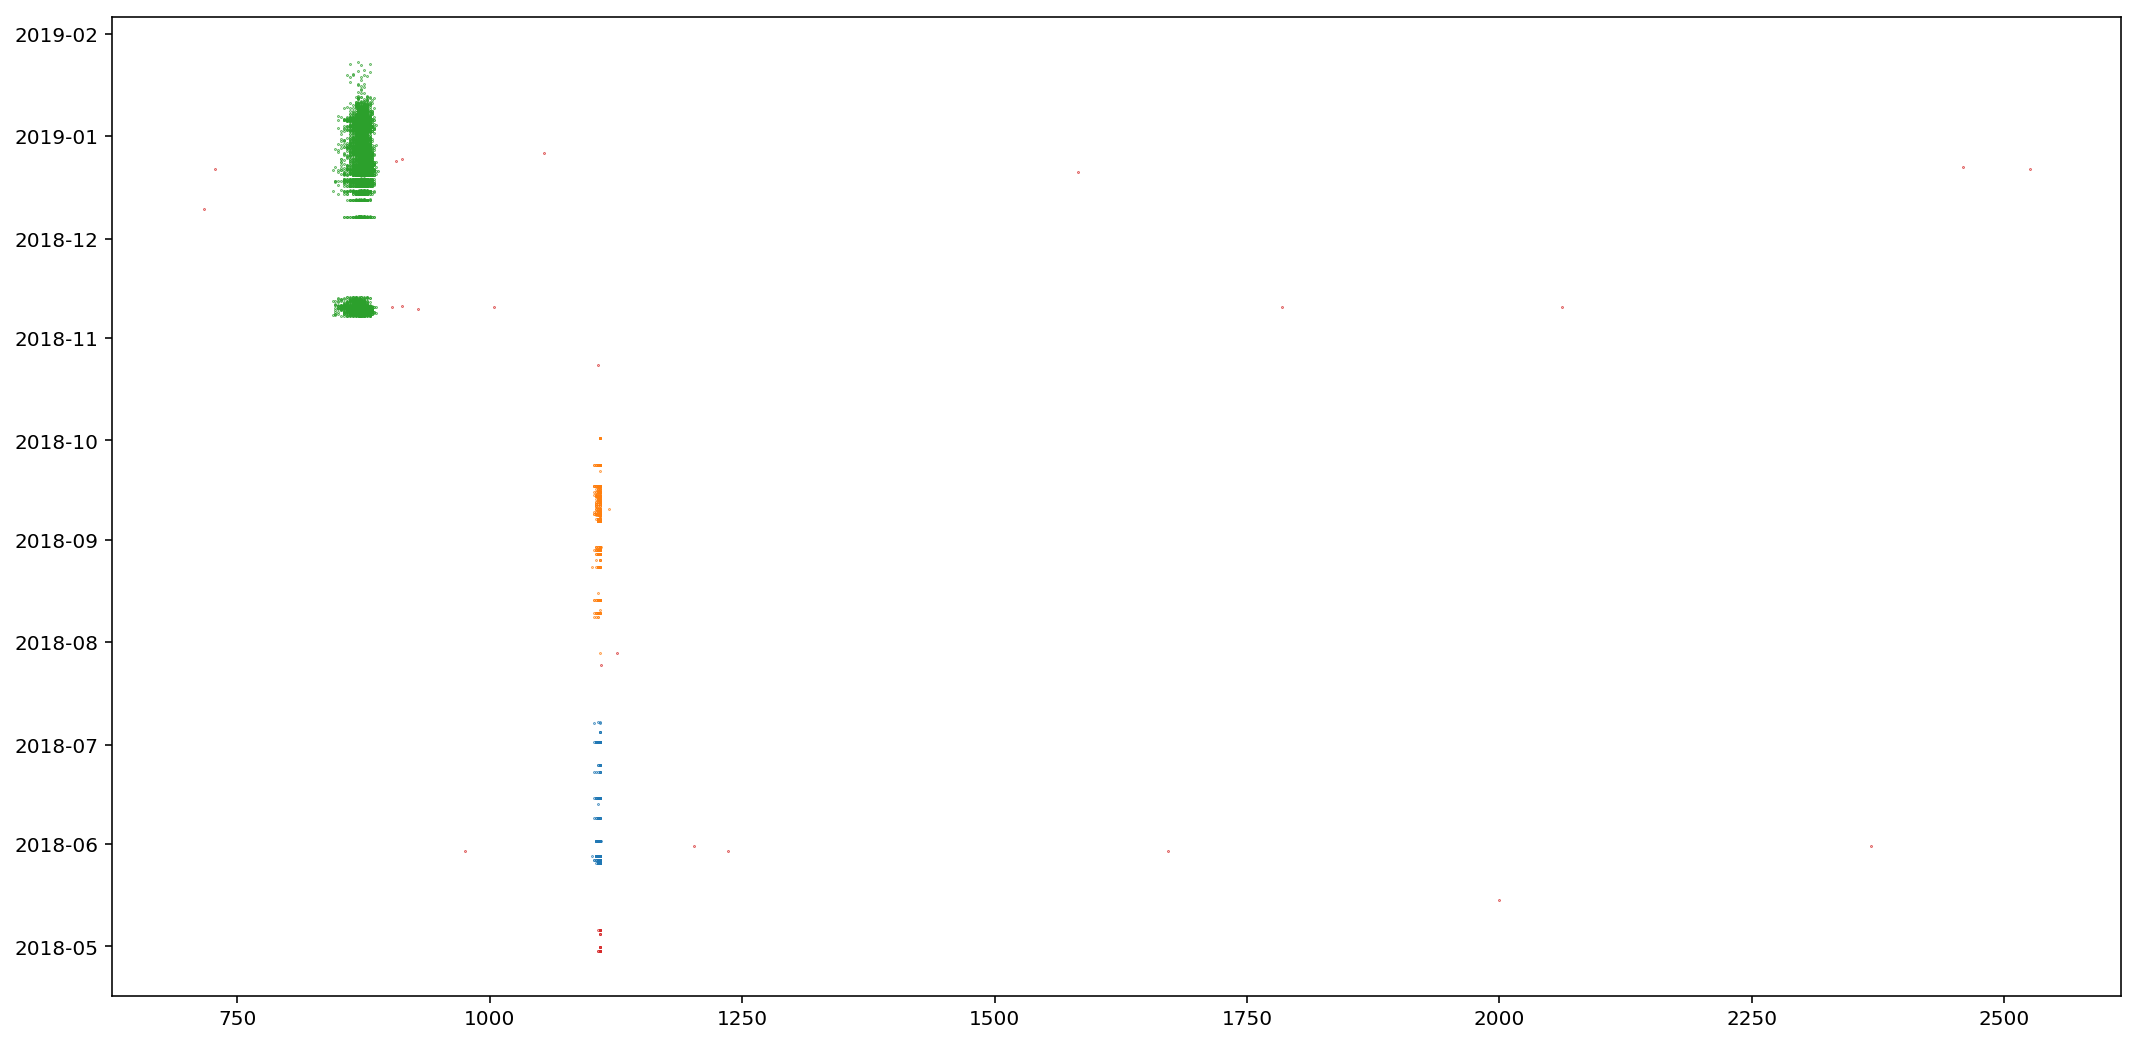

In [435]:
s=set(labels)
for i in s:
    plt.scatter(x = loc_frame[loc_frame["label"]==i][location_col], y = loc_frame[loc_frame["label"]==i]["times"], s=.1)

In [436]:
#Aantal gevonden clusters
len(s)-1

3

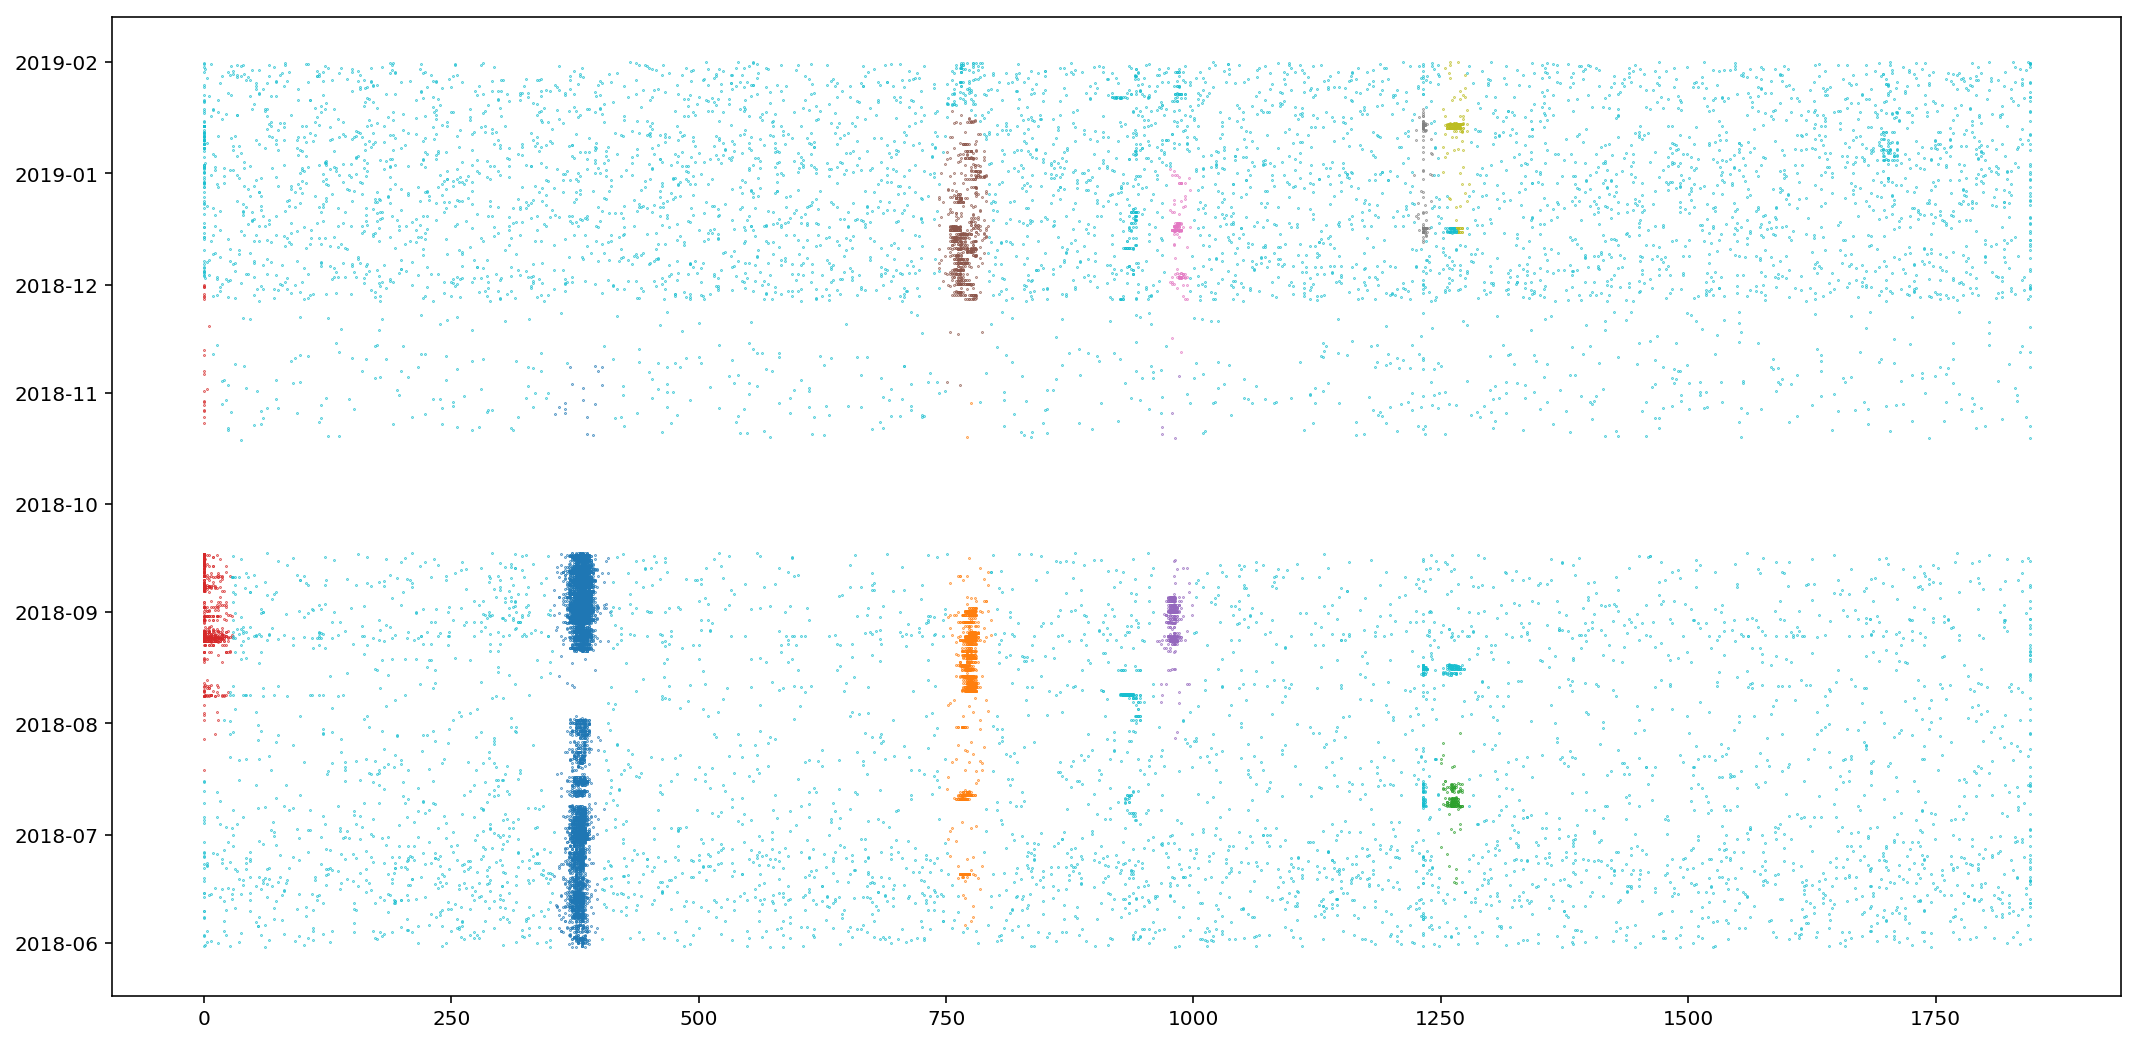

In [444]:
s=set(labels)
for i in s:
    plt.scatter(x = loc_frame[loc_frame["label"]==i][location_col], y = loc_frame[loc_frame["label"]==i]["times"], s=.1)

In [445]:
#Aantal gevonden clusters
len(s)-1

9

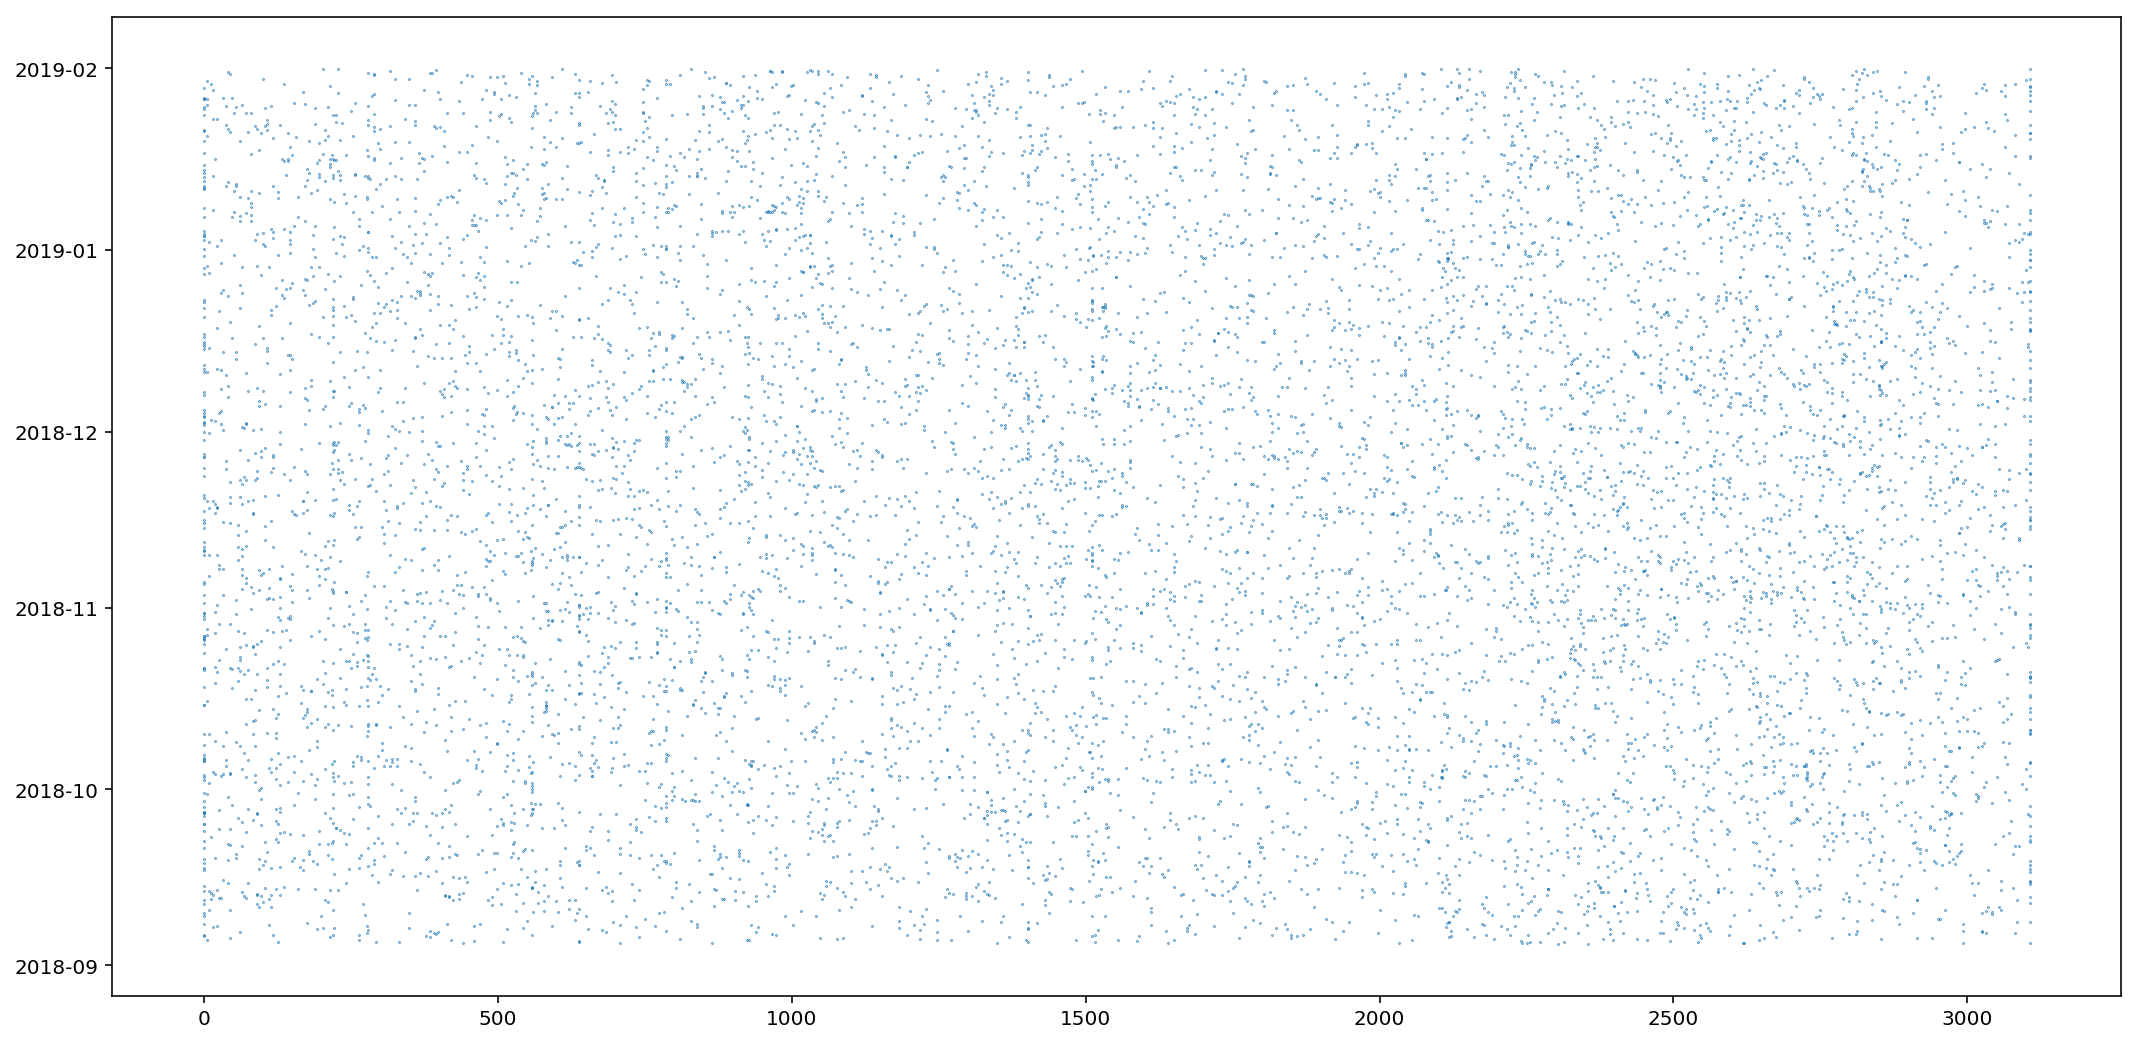

In [470]:
s=set(labels)
for i in s:
    plt.scatter(x = loc_frame[loc_frame["label"]==i][location_col], y = loc_frame[loc_frame["label"]==i]["times"], s=.1)

In [454]:
#Aantal gevonden clusters
len(s)-1

0